## <center> École Polytechnique de Montréal <br> Département Génie Informatique et Génie Logiciel <br>  INF8460 – Traitement automatique de la langue naturelle <br> </center>

## <center> Projet - Les LLMs et la génération augmentée de récupération (RAG) pour les questions-réponses<br> Automne 2024 </center>


## 1. Introduction



### 1.1. Description du TP4



Dans ce TP, vous allez travailler sur un système de **génération augmentée de récupération**, ou **RAG** (pour Retrieval Augmented Generation en anglais) qui combine des modèles de langue génératifs et de recherche d'information.



Étant donnée une question, il faudra retrouver les passages les plus pertinents  avec un modèle de recherche. Ensuite, il faudra générer une réponse à la question en utilisant ces passages de texte. Vous aurez finalement à trouver des manières d'améliorer les performances de votre modèle RAG.



L'ensemble est noté sur 100 points.



### Description des données



Les passages donnés sont des textes en anglais de quelques phrases sur divers sujets. Par exemple, les mathématiques, la physique, la chimie, la biologie l'informatique, la musique et la psychologie. En général, les textes abordent des sujets très spécifiques reliés à un domaine. Par exemple, il pourrait y avoir 1000 textes parlant d'informatique et 100 qui abordent, à leur manière, la notion de mémoire. Parmi ces 100 passages, 5 pourraient aborder la mémoire dans un processeur spécifique.



En ce qui concerne les questions, elles sont basées sur les sujets de certains textes précis et on peut y répondre à l'aide d'au moins un des textes. Dans certains cas, plusieurs textes sont nécessaires pour répondre à la question. Par exemple, plusieurs textes pourraient aborder le processeur Intel i7-13700k, mais la question pourrait nécessiter l'information de tous ces textes pour trouver la réponse.

Les questions ont été créées pour faire en sorte que les réponses soient assez courtes. Il peut s'agir d'un simple nombre ou de quelques mots (< 30 mots).





Vous trouverez ~ 13 000 passages dans le corpus pour ~ 1 700 paires de questions / réponses dans le jeu d'entraînement et ~ 500 dans le jeu de validation. Vous devez prédire 500 réponses aux questions du jeu de test.



### Exemple



Par exemple, pour la question



> What type of bonds are used to form branches in glycogen?



Avec l'approche RAG, plutôt que de générer la réponse directement, on va d'abord chercher dans un corpus de passages. Dans cet exemple, un des passages pertinents est :



> **Glycogen Structure and Function** : Glycogen is a molecular polymer of glucose used for energy storage. It is composed of linear chains of glucose molecules linked by α-1,4-glycosidic bonds, with branches formed off the chain via α-1,6-glycosidic bonds. The branches provide additional ""free ends"" for linear chains, allowing for faster glucose release.



Puis on génère une réponse conditionnée par les passages pertinents :



> α-1,6-glycosidic bonds



### Motivation



Le RAG est une approche très populaire en ce moment. Elle permet notamment d'avoir des sources qui supportent les réponses générées, ce qui peut être utile pour la vérification de faits ou pour contrôler les hallucinations. De plus, elle permet d'intégrer des connaissances externes et récentes dans les modèles de génération sans avoir à les ré-entraîner.



### Objectif du TP



Dans ce TP, vous implémenterez plusieurs systèmes de question-réponse. D'abord, vous testerez une approche de prompting qui n'utilise aucun passage pour aider le modèle de génération. Puis vous implémenterez un système figé qui utilise un modèle de plongements figé pour retrouver les $k$ passages les plus pertinents. Ces passages seront ensuite donnés à un modèle de génération figé aussi.



Enfin, vous implémenterez votre propre méthode dans l'objectif d'atteindre les meilleures performances dans la compétition Kaggle.



### Jeux de données



Vous avez 4 fichiers à votre disposition :

- 'rag_texts.csv' : le corpus de passages extraits de Wikipédia.

  - **id** : l'identifiant unique du passage.

  - **text** : le texte du passage.

- 'rag_questions_train.csv', 'rag_questions_val.csv' et 'rag_questions_test.csv' : les questions d'entraînement, de validation et de test.

  - **id** : l'identifiant unique de la question.

  - **question** : La question.

  - **text_id** (sauf pour le fichier de test) : la liste des identifiants des passages pertinents du corpus 'rag_texts.csv' pour la question.

  - **answer** (sauf pour le fichier de test) : la réponse à la question.



### Contraintes



- **Modèle génératif** : pour des raisons d'équité, le seul modèle de génération que vous pouvez utiliser est [microsoft/Phi-3-mini-128k-instruct](https://huggingface.co/microsoft/Phi-3-mini-128k-instruct), disponible sur Hugging Face. Cette contrainte permet de mieux comparer les différentes approches et d'éviter que la performance soit uniquement due à un modèle de génération plus performant.

- Données externes : vous ne pouvez pas utiliser de données externes pour entraîner vos modèles, seulement les données fournies.

- Modèles de plongements à utiliser: [BAAI/bge-small-en-v1.5](https://huggingface.co/BAAI/bge-small-en-v1.5)

### 1.2. Librairies permises



Vous pouvez utiliser les librairies suivantes

- Numpy

- Pandas

- HuggingFace

- nltk

- SpaCy

- PyTorch

- faiss

- Langchain

- re





- Pour toute autre librairie, demandez à votre chargé de laboratoire

### 1.3. Infrastructure



- Vous avez accès aux GPU du local L-4818. Dans ce cas, vous devez utiliser le dossier temp (voir le tutoriel VirtualEnv.pdf)

- Vous pouvez aussi utiliser l’environnement Google Colab :  https://colab.research.google.com/

### 1.4. Remise



### Échéance



Fin de la session. La date précise sera indiquée dans les boites de remise sur Moodle.


### Livrables



Vous devez remettre votre notebook sur Moodle et Gradescope en ipynb et pdf. Pour Gradescope vous devez associer les numéros de questions avec vos réponses dans le pdf grâce à l'outil que fournit Gradescope.





### Critères

1. Implantation correcte et efficace

2. Richesse de la solution proposée

3. Qualité du code (noms significatifs, structure, performance, gestion d’exception, etc.)

4. Commentaires clairs et informatifs

5. Aspect novateur

6. État de l'art synthétisé

7. Performance attendue des modèles

8. Réponses correctes/sensées aux questions de réflexion ou d'analyse



### CODE D’HONNEUR

- __Règle 1__:  Le plagiat de code est bien évidemment interdit. Toute utilisation de code doit être référencée adéquatement. L’utilisation de code ne peut concerner que les architectures de base (par exemple le Transformer). Vous __ne pouvez pas__ soumettre un code écrit par quelqu’un d’autre.

- __Règle 2__: Vous êtes libres de discuter des idées et des détails de mise en œuvre avec d'autres équipes. Cependant, vous ne pouvez en aucun cas consulter le code d'une autre équipe INF8460, ou incorporer leur code dans votre TP.

- __Règle 3__:  Vous ne pouvez pas partager votre code publiquement (par exemple, dans un dépôt GitHub public) tant que le cours n'est pas fini.


### 1.5. Kaggle



La compétion Kaggle sera accessible ici: https://www.kaggle.com/t/c970abbf273b4e13a642fce3bfe219be.



Vous devez recréer des équipes de 3 personnes sur Kaggle avec le même nom d'équipe que sur Moodle ainsi que les mêmes membres.



Le TP4 se fera sous forme d’une compétition Kaggle.  Vous devrez utiliser l’environnement Kaggle pour la soumission et l’évaluation de vos meilleurs modèles.  

Pour tester votre modèle au fur et à mesure, vous aurez le droit à 4 soumissions par jour sur Kaggle. Il y aura deux types de résultats : votre « private leaderboard » et votre « public leaderboard » :

- Le « public leaderboard » est calculé sur approximativement 30% des données de test, choisies aléatoirement par Kaggle. Ce score est public et est calculé sur la même tranche de données pour tous les participants.

- Le « private leaderboard » est calculé sur approximativement 70% des données de test et n’est visible qu’à la fin de la compétition. Le résultat final sera basé sur ce leaderboard. Si aucune soumission n’est choisie, la soumission avec le meilleur score sur le « public leaderboard » sera utilisée pour calculer le score sur le « private leaderboard ».



Pour l’évaluation, vous devrez soumettre un fichier de données _tp4_submission.csv_ du même format que le fichier _sample_submission.csv_ (disponible sur le site de la compétition et Moodle).


### 1.6. Description des données et métriques d’évaluation



Dans votre fichier de soumission, il doit y avoir une colonne _id_ et une colonne _answer_. La colonne _id_ doit correspondre à l'identifiant unique de la question et la colonne _answer_ doit correspondre à la réponse générée par votre modèle.



Nous utiliserons la métrique **BLEU**, vue en cours, pour évaluer les réponses générées par rapport au jeu de référence (gold standard).

In [ ]:
!pip install faiss-gpu -q

!pip install langchain -q

!pip install langchain-huggingface -q

!pip install langchain-community -q

!pip install langchain-text-splitters -q

!pip install rank-bm25 -q

!pip install -U bitsandbytes transformers

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf 24.8.3 requires cubinlinker, which is not installed.
cudf 24.8.3 requires cupy-cuda11x>=12.0.0, which is not installed.
cudf 24.8.3 requires ptxcompiler, which is not installed.
cuml 24.8.0 requires cupy-cuda11x>=12.0.0, which is not installed.
dask-cudf 24.8.3 requires cupy-cuda11x>=12.0.0, which is not installed.
cudf 24.8.3 requires cuda-python<12.0a0,>=11.7.1, but you have cuda-python 12.6.0 which is incompatible.
distributed 2024.7.1 requires dask==2024.7.1, but you have dask 2024.9.1 which is incompatible.
google-cloud-bigquery 2.34.4 requires packaging<22.0dev,>=14.3, but you have packaging 24.2 which is incompatible.
jupyterlab 4.2.5 requires jupyter-lsp>=2.0.0, but you have jupyter-lsp 1.5.1 which is incompatible.
jupyterlab-lsp 5.1.0 requires jupyter-lsp>=2.0.0, but you have jupyter-lsp 1.5.1 which 

In [ ]:
# Import des librairies



import os

import torch

import numpy as np

import pandas as pd

from tqdm import tqdm

import matplotlib.pyplot as plt

from torch.utils.data import DataLoader, Dataset

from torch.optim import AdamW

from typing import Optional

from transformers import AutoTokenizer, AutoModel, AutoModelForCausalLM, pipeline, BitsAndBytesConfig

from transformers import AutoModelForCausalLM, AutoTokenizer

from collections import Counter

import nltk

from nltk.tokenize import word_tokenize

from nltk.corpus import stopwords

from nltk.translate.bleu_score import sentence_bleu,SmoothingFunction

nltk.download('punkt_tab')



from rank_bm25 import BM25Okapi

import faiss

import random

from langchain_community.document_loaders import TextLoader

from langchain_community.vectorstores import FAISS

from langchain_huggingface import HuggingFaceEmbeddings

from langchain.retrievers import ContextualCompressionRetriever

from langchain.retrievers.document_compressors import CrossEncoderReranker

from langchain_community.cross_encoders import HuggingFaceCrossEncoder

from langchain_core.documents import Document

from langchain.callbacks.tracers import ConsoleCallbackHandler

[nltk_data] Downloading package punkt_tab to /usr/share/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
import logging

logging.getLogger("langchain").setLevel(logging.ERROR)

In [ ]:
root_path = '/kaggle/input/data-tp4/'

data_path = root_path + 'data/'

## 2. Analyse exploratoire et modèle de génération simple (15 points)



Pour commencer ce TP, et pour fixer des modèles de base (baselines), vous allez utiliser un modèle de génération simple pour répondre aux questions. Vous utiliserez le modèle de génération **'microsoft/Phi-3-mini-128k-instruct'** disponible sur Hugging Face. Dans cette partie, vous devez simplement générer des réponses aux questions de l'ensemble de validation (_questions_val.csv_) sans utiliser de passages pour aider le modèle.

### 2.1. Chargement des données (5 points)

#### 2.1.1 Taille des données (1 point)



Affichez la taille de tous les jeux de données et quelques questions de l'ensemble d'entraînement

In [ ]:
# TODO

df_train = pd.read_csv(f"{data_path}questions_train.csv")

df_test = pd.read_csv(f"{data_path}questions_test.csv")

df_val = pd.read_csv(f"{data_path}questions_val.csv")

print(f"Les dimensions de train est de {df_train.shape}, de val est de {df_val.shape} et de test est de {df_test.shape}")

df_train.head(5)

# END TODO

Les dimensions de train est de (1747, 6), de val est de (500, 6) et de test est de (500, 3)


,Unnamed: 0.1,Unnamed: 0,id,text_ids,question,answer
0,1384,0,2303,[9797 8675 11007 4654],What type of insects are vectors for the Haemo...,"Ceratopogonidae, Culicidae, and Nycteribiidae"
1,2157,0,2310,[736 9830 5892 3158],What is the basis of the security of the BBS a...,The computational difficulty of factoring larg...
2,1685,0,2548,[10371 6103],What is the purpose of the catalase test in ba...,To identify bacterial species and determine th...
3,1122,0,552,[11829 6677 7137],What type of cells clear small particles in ve...,Scavenger endothelial cells
4,1799,0,1822,[4105 1016],What information is needed to decrypt a messag...,The user's private key


#### 2.1.2 Analyse exploratoire (4 points)



a) Sur l'ensemble d'entraînement, affichez :

- Le nombre moyen de mots dans une question

- Le nombre moyen de mots dans une réponse

- Le nombre moyen de passages nécessaires pour répondre à une question

- Le nombre minimal de passages nécessaires pour répondre à une question

- Le nombre maximal de passages nécessaires pour répondre à une question


In [ ]:
# TODO

df_train_copy = df_train.copy()

df_nbr_word_question=df_train_copy["question"].apply(lambda x:len(word_tokenize(x)))

mean_words_per_question = df_nbr_word_question.mean()

df_nbr_word_answer = df_train_copy["answer"].apply(lambda x:len(word_tokenize(x)))

mean_words_per_answer = df_nbr_word_answer.mean()

df_nbr_passage = df_train_copy["text_ids"].apply(lambda x:len(x.split()))

mean_passages = df_nbr_passage.mean()

min_passages = df_nbr_passage.min()

max_passages = df_nbr_passage.max()

# END TODO

print(f"Le nombre moyen de mots dans une question : {mean_words_per_question:.2f} \nLe nombre moyen de mots dans une réponse : {mean_words_per_answer:.2f} \nLe nombre moyen de passages nécessaires pour répondre à une question: {mean_passages:.2f} \nLe nombre minimal de passages nécessaires pour répondre à une question : {min_passages} \nLe nombre maximal de passages nécessaires pour répondre à une question : {max_passages}")

Le nombre moyen de mots dans une question : 11.49 
Le nombre moyen de mots dans une réponse : 6.64 
Le nombre moyen de passages nécessaires pour répondre à une question: 2.84 
Le nombre minimal de passages nécessaires pour répondre à une question : 2 
Le nombre maximal de passages nécessaires pour répondre à une question : 4


b) De plus, affichez des histogrammes décrivant la distribution du nombre de mots des questions, des réponses et des textes. Utilisez des bacs (bins) de 50. Commentez vos résultats.

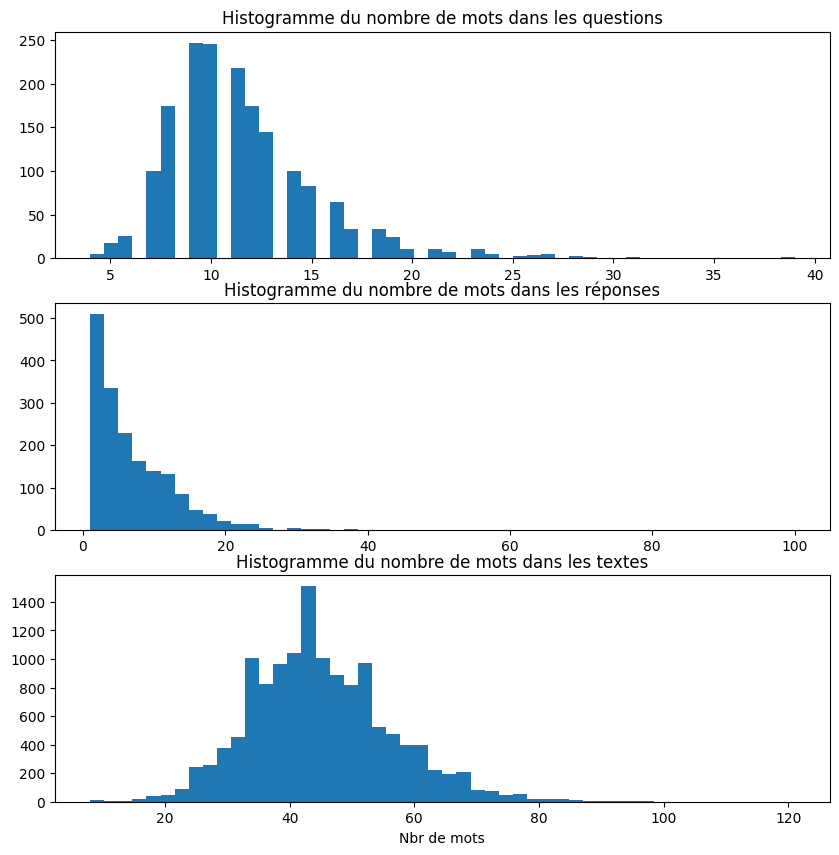

In [ ]:
# TODO

df_corpus = pd.read_csv(f"{data_path}texts.csv")

df_texts_nbr_words = df_corpus["text"].apply(lambda x:len(word_tokenize(x)))

fig,axes= plt.subplots(nrows=3,figsize=(10,10))

axes[0].hist(df_nbr_word_question.to_numpy(),bins=50)

axes[1].hist(df_nbr_word_answer.to_numpy(),bins=50)

axes[2].hist(df_texts_nbr_words.to_numpy(),bins=50)

axes[2].set_xlabel("Nbr de mots")

axes[0].set_title("Histogramme du nombre de mots dans les questions")

axes[1].set_title("Histogramme du nombre de mots dans les réponses")

axes[2].set_title("Histogramme du nombre de mots dans les textes")

plt.show()

# TODO

> Réponse : On observe qu'il y a des questions de taille en moyenne autour des 10 mots. Les réponses dans ce jeu de données sont assez courtes, la plupart sont à moins de 15 mots. Et les textes sont en moyenne composés d'une quarantaine de mots.

### 2.2. Chargement du modèle et génération des réponses (5 points)



Nous allons maintenant évaluer la performance d'un modèle de langue à répondre aux questions de l'ensemble de validation. Chargez d'abord le modèle **'microsoft/Phi-3-mini-128k-instruct'** avec la librairie `transformers` de huggingface et générez les réponses du modèle à partir de la question. Générez au maximum 32 nouveaux jetons.

In [ ]:
BATCH_SIZE = 1

DEVICE="cuda:0"

In [ ]:
# TODO

model_id = 'microsoft/Phi-3-mini-128k-instruct'

model_decoder = AutoModelForCausalLM.from_pretrained(model_id, device_map=DEVICE,  torch_dtype=torch.bfloat16,  trust_remote_code=True,)

tokenizer_decoder = AutoTokenizer.from_pretrained(model_id)

# END TODO

In [ ]:
# TODO:

with torch.no_grad():

    model_decoder.eval()

    questions = [({"role": "user", "content": row["question"]}, row["id"]) for _, row in df_val.iterrows()]

    generated_answer = []

    for i in tqdm(range(0, len(questions), BATCH_SIZE)):

        # Sélectionner le batch de questions

        batch_questions = questions[i:i + BATCH_SIZE]

        # Créer les inputs pour le modèle en batch

        input_texts = [[{"role":"system","content":"Answer the following question concisely only with the answer."},q[0]] for q in batch_questions]

        input_template = tokenizer_decoder.apply_chat_template(input_texts,

                                   tokenize=True,

                                    truncaton=True,

                                    padding=True,

                                    add_generation_prompt=True, # On veut que le décodeur génère la suite de la conversation à partir de la question

                                   return_tensors="pt").to(DEVICE)

        # Génération du texte avec le modèle

        outputs = model_decoder.generate(input_template,

                                     max_new_tokens=32, # Génère seulement 32 nouveaux tokens

                                     num_beams=1,

                                     do_sample=False)

        # Décoder les réponses générées en batch

        decoded_answers = tokenizer_decoder.batch_decode(outputs, skip_special_tokens=True)

        # Enregistrer seulement la première solution pour chaque réponse

        for j, answer in enumerate(decoded_answers):

            id_question = batch_questions[j][1]

            generated_answer.append((decoded_answers[j], id_question))



    torch.cuda.empty_cache()


  0%|          | 0/500 [00:00<?, ?it/s]The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
The `seen_tokens` attribute is deprecated and will be removed in v4.41. Use the `cache_position` model input instead.
`get_max_cache()` is deprecated for all Cache classes. Use `get_max_cache_shape()` instead. Calling `get_max_cache()` will raise error from v4.48
100%|██████████| 500/500 [08:28<00:00,  1.02s/it]


In [ ]:
def traitement(answers):

    """

    On prétraite les sorties du décodeur, car il renvoit l'ensemble de la conversation.

    C'est pourquoi on coupe la sortie et on ne retient que la réponse générée.

    """

    answers_treated=[]

    for answer in answers:

        answers_treated.append((answer[0].split("?")[1],answer[1]))

    return answers_treated

In [ ]:
treated_answers = traitement(generated_answer)

### 2.3. Évaluation des réponses (3 points)



Complétez la fonction `evaluate_bleu` et utilisez la métrique BLEU pour évaluer les réponses générées par rapport aux réponses attendues sur le jeu de validation. Évaluez votre modèle avec les métriques BLEU-1 et BLEU-2. BLEU-1 ne considère que les unigrammes pour évaluer la réponse et BLEU-2 considère les bigrammes aussi. Pour séparer une séquence en mots, vous pouvez simplement utiliser la fonction `split()`.

In [ ]:
def evaluate_bleu(df_true: pd.DataFrame, df_pred: pd.DataFrame, bleu_type: int):

    """

    Évalue les réponses générées en utilisant la métrique BLEU.

    Paramètres:

    df_true (pd.DataFrame): DataFrame contenant les vraies réponses avec des colonnes 'id' et 'answer'.

    df_pred (pd.DataFrame): DataFrame contenant les réponses prédites avec des colonnes 'id' et 'answer'.

    bleu_type (int): Nombre (soit 1 ou 2) correspondant aux n-grammes considérés pour la métrique (bleu_type = 1 : BLEU-1, bleu_type = 2 : BLEU-2)



    Retourne:

    float: Score BLEU moyen sur toutes les entrées.

    """

    smooth_func = SmoothingFunction().method1

    # TODO

    bleu_scores = []

    for i in range(df_true.shape[0]):

        true_answer = df_true.iloc[i]['answer']

        pred_answer = df_pred.iloc[i]['answer']

        weights = (1.0,0,0,0) if bleu_type == 1 else (0.5,0.5,0,0)

        bleu_score = sentence_bleu([true_answer.split()], pred_answer.split(), weights=weights, smoothing_function=smooth_func)

        bleu_scores.append(bleu_score)

    return np.mean(bleu_scores)

    # END TODO

In [ ]:
# TODO

# Scores des générations avec BLEU-1 et BLEU-2 sur le jeu de validation

df_pred_val = pd.DataFrame(treated_answers, columns=["answer","id"])

df_truth_val = df_val[["answer","id"]]

print(f"Score validation Bleu-1 : {evaluate_bleu(df_truth_val,df_pred_val,1)*100:.3f}%")

print(f"Score validation Bleu-2 : {evaluate_bleu(df_truth_val,df_pred_val,2)*100:.3f}%")

# END TODO

Score validation Bleu-1 : 18.318%
Score validation Bleu-2 : 10.718%


### 2.4. Commentaire (2 points)



Reportez, puis commentez la performance obtenue ici.

In [ ]:
# A gauche la prédiction et à droite la vérité

pd.concat((df_pred_val.head(5),df_truth_val.head(5)),axis=1)

,answer,id,answer,id
0,The M201V variant of CYSLTR2 shows reduced re...,780,It exhibits decreased responsiveness,780
1,Carbapenems have a different beta-lactam ring...,1870,A carbon atom replaces the sulfur atom in posi...,1870
2,All of the above.,654,8-demicubes and 8-orthoplex facets,654
3,Schedule I controlled substance.,2538,It is a controlled substance,2538
4,Estrone,745,E2MATE,745


In [ ]:
# Réponse:

# On constate que le modèle sans prompting va génèrer beaucoup de tokens et ne va pas directement au but.
# La performance s'améliore quand le prompting clairement stipule que la réponse doit être "concise" et "qu'il n'y a que la réponse".
# Une deuxième remarque est qu'il hallucine très facilement. Par exemple, pour la première réponse on s'attend à une "E2MATE",
# tandis que la réponse générée est "Estrone".

> Performance obtenue : (dépendant du batch-size)

* BLEU-1 : 17%-18%

* BLEU-2 : 9%-10%

## 3. Approche RAG figé (45 points)



Dans cette partie, vous allez implémenter une approche simple de RAG figé. On dit ici que le modèle est figé car on ne ré-entraîne aucun modèle. Vous implémenterez deux variantes : avec ou sans l'utilisation d'un algorithme d'indexation.



Dans la méthode d'implémentation du RAG figé, vous allez d'abord retrouver les passages pertinents pour chaque question avec un modèle de plongements de type Transformers, puis générer une réponse conditionnée par ces passages.



Dans cette partie, on utilisera

- le modèle de plongements (embedding-model) **[BAAI/bge-small-en-v1.5](https://huggingface.co/BAAI/bge-small-en-v1.5)** pour obtenir les vecteur de plongements des questions et des passages

- le modèle de génération (generative-model) **[microsoft/Phi-3-mini-128k-instruct](https://huggingface.co/microsoft/Phi-3-mini-128k-instruct)** pour générer les réponses

### 3.1 RAG figé sans indexation (23 points)

#### 3.1.1 Passages pertinents (8 points)



Pour retrouver les passages pertinents, vous devez d'abord encoder les questions et les passages avec le modèle de plongements. Puis, vous devez calculer la similarité cosinus entre les questions et les passages pour retrouver les $k$ passages les plus pertinents pour chaque question.

In [ ]:
# TODO

model_embeddings = AutoModel.from_pretrained('BAAI/bge-small-en-v1.5').to(DEVICE)

tokenizer_embeddings = AutoTokenizer.from_pretrained('BAAI/bge-small-en-v1.5')

# END TODO

In [ ]:
def encode_sequences(sequences: list, tokenizer, model, device = DEVICE, batch_size = BATCH_SIZE):

    """

    Encode les textes en utilisant le modèle passé en paramètre pour générer les plongements des textes



    Paramètres:

    sequences    : Liste de séquence à transformer en plongements

    tokenizer   : Segmenteur du modèle de plongements

    model       : Modèle de plongements

    device      : Machine sur laquelle les opérations doivent être effectuées

    batch_size  : Taille des lots lors de la génération des traitements

    """

    # TODO

    model.to(device)

    model.eval()

    embeddings = []

    # Traitement des séquences par lots

    for i in tqdm(range(0, len(sequences), batch_size)):

        batch_sequences = sequences[i:i + batch_size]

        #print(batch_sequences)

        # Tokenisation en batch avec padding

        inputs = tokenizer(

            batch_sequences.tolist(), padding=True, truncation=True, return_tensors="pt"

        ).to(device)

        # Désactiver le calcul de gradients pour optimiser la mémoire et la vitesse

        with torch.no_grad():

            # Passage dans le modèle pour obtenir les embeddings

            outputs = model(**inputs)

            # Récupération des embeddings (par exemple, les vecteurs de la dernière couche cachée)
            # Pour les modèles de type BERT, les embeddings se trouvent dans `outputs.last_hidden_state`
            # Utilisation de la représentation [CLS] (premier token) pour chaque séquence
            batch_embeddings = outputs.last_hidden_state[:, 0, :]  # Taille : (batch_size, hidden_dim)

        # Ajout des embeddings du batch à la liste principale

        embeddings.append(batch_embeddings.cpu())

    # Concaténation de tous les lots en un seul tensor

    return torch.cat(embeddings, dim=0)

    # END TODO

In [ ]:
# TODO

df_val_question = df_val["question"].to_numpy()

df_ref = pd.read_csv(f"{data_path}texts.csv")

df_text_ref = df_ref["text"].to_numpy()

with torch.no_grad():

    questions_val_embedded = encode_sequences(df_val_question,tokenizer_embeddings,model_embeddings)

    text_ref_embedded= encode_sequences(df_text_ref,tokenizer_embeddings,model_embeddings)

    torch.cuda.empty_cache()

# END TODO

100%|██████████| 13314/13314 [01:46<00:00, 124.43it/s]


In [ ]:
def find_most_relevant_texts(question_embeddings, answer_embeddings, top_k=1):

    """

    Trouve les réponses les plus pertinentes pour chaque question en utilisant la similarité cosinus.



    Paramètres:

    question_embeddings (torch.Tensor): Tensor des plongements des questions, de forme (num_questions, embedding_dim).

    answer_embeddings (torch.Tensor): Tensor des plongements des réponses, de forme (num_answers, embedding_dim).

    top_k (int): Nombre de réponses les plus pertinentes à retourner pour chaque question.



    Retourne:

    list of list: Une liste contenant, pour chaque question, les indices et similarités des réponses les plus pertinentes.

    """

    results = []

    # Calculer la similarité cosinus pour chaque question avec toutes les réponses

    for question_emb in question_embeddings:

        # Calculer la similarité cosinus entre la question et tous les embeddings de réponses

        similarities = torch.nn.functional.cosine_similarity(question_emb.unsqueeze(0), answer_embeddings)

        # Trouver les `top_k` indices des réponses les plus similaires

        top_k_values, top_k_indices = torch.topk(similarities, top_k)

        # Stocker les résultats

        relevant_texts = [idx.item() for idx, score in zip(top_k_indices, top_k_values)] #[(idx.item(), score.item()) for idx, score in zip(top_k_indices, top_k_values)]

        results.append(relevant_texts)

    return results

#### 3.1.2 Évaluation des passages retrouvés avec Recall@k et precision@k (7 points)



Maintenant que les passages ont tous été encodés, on peut évaluer si les passages retrouvés sont pertinents. En prenant les $k$ premiers passages, on peut évaluer si on retrouve les bons passages associés aux questions. C'est un des avantages du système RAG : on peut évaluer de façon indépendante la qualité du système qui retrouve les passages pertinents et de celui qui génère les réponses. Cela permet notamment d'évaluer quels sont les points forts et points faibles du système.



Pour cela, vous allez utiliser les métriques **Precision@k** et **Recall@k** définies dans les équations suivantes. Implémentez ces métriques.



$$\text{Precision@k} = \frac{\text{Nombre d'éléments pertinents dans les k premiers}}{k}$$



$$\text{Recall@k} = \frac{\text{Nombre d'éléments pertinents dans les k premiers}}{\text{Nombre total d'éléments pertinents}}$$


In [ ]:
def compute_recall_at_k(ground_truth, predictions):

    """

    Calcule la métrique du "Recall@k". On assume que predictions contiennent le bon nombre de passages (=k)



    Paramètres:

    ground_truth : Liste contenant tous les vrais passages associés aux questions (ex : [[1, 2, 3], [4, 5, 6]] si les passages de la question 1 sont [1, 2, 3] et

    les passages de la question 2 sont [4, 5, 6])

    predictions : Liste contenant tous les passages retrouvés pour chacune des questions formattée de la même manière que `ground_truth`



    Retourne:

    Recall moyen

    """

    # TODO

    common_relevant_ref = [ len(set(ground_truth[i]) & set(predictions[i])) / len(set(ground_truth[i])) for i in range(len(ground_truth))]

    return np.mean(common_relevant_ref)

    # END TODO

In [ ]:
def compute_precision_at_k(ground_truth, predictions):

    """

    Calcule la métrique du "Precision@k". On assume que predictions contiennent le bon nombre de passages (=k)



    Paramètres:

    ground_truth : Liste contenant tous les vrais passages associés aux questions (ex : [[1, 2, 3], [4, 5, 6]] si les passages de la question 1 sont [1, 2, 3] et

    les passages de la question 2 sont [4, 5, 6])

    predictions : Liste contenant tous les passages retrouvés pour chacune des questions formattée de la même manière que `ground_truth`



    Retourne:

    Précision moyenne

    """

    k = len(set(predictions[0]))

    # TODO

    common_relevant_ref = [ len(set(ground_truth[i]) & set(predictions[i])) / k for i in range(len(ground_truth))]

    return np.mean(common_relevant_ref)



    # END TODO


#### 3.1.3 Résultat d'évaluation (5 points)

Implémentez la fonction _'retrieve_passages'_ qui retourne les indices des $k$ passages les plus similaires pour une question. Utilisez la similarité cosinus pour comparer les passages et les questions. Évaluez ensuite votre modèle récupérant les passages avec les métriques Precision@k et Recall@k sur le jeu de validation. Calculez avec $k={1, 2, 3, 4, 5}$.

In [ ]:
def retrieve_passages(questions: list, passage_embed: torch.Tensor, k: int, embedding_model_tokenizer, embedding_model):

    """

    Retourne les k passages les plus pertinents pour chaque question passée en paramètre



    Paramètres:

    questions       : Les questions pour lesquelles on cherche les passages les plus pertinents

    passage_embed   : Tenseur contenant les plongements de chaque passage (n, dim)

    k               : le nombre de passages à retourner

    tokenizer       : Segmenteur du modèle de plongements

    model           : Modèle de plongements



    Retourne:

    Les indices des k passages les plus pertinents pour la question

    """

    # TODO

    questions_embeddings = encode_sequences(questions,embedding_model_tokenizer,embedding_model)

    results = find_most_relevant_texts(questions_embeddings,passage_embed,top_k=k)

    return results

    # END TODO


In [ ]:
truth_ref_val= [ [int(ref_text) for ref_text in element.replace("[","").replace("'","").replace("]","").replace(",", "").split() if ref_text not in set([" ",",","'"])] for element in df_val["text_ids"].to_numpy() ]

In [ ]:
# TODO

with torch.no_grad():

    precision_at_k = []

    recall_at_k=[]

    f1_score_at_k=[]

    for k in range(1,6):

        results=retrieve_passages(df_val_question,text_ref_embedded,k,tokenizer_embeddings,model_embeddings)

        precision_k=compute_precision_at_k(truth_ref_val, results)

        recall_k=compute_recall_at_k(truth_ref_val, results)

        precision_at_k.append(precision_k)

        recall_at_k.append(recall_k)

        f1_score_at_k.append((2*precision_k*recall_k/(recall_k+precision_k)))



        print(f"Précision@{k} : {precision_k*100:.3f}%; Rappel@{k} : {recall_k*100:.3f}%: F1-score@{k} : {(2*precision_k*recall_k/(recall_k+precision_k))*100:.3f}%")

        torch.cuda.empty_cache()

# END TODO

100%|██████████| 500/500 [00:03<00:00, 134.45it/s]


Précision@1 : 89.000%; Rappel@1 : 33.283%: F1-score@1 : 48.448%


100%|██████████| 500/500 [00:03<00:00, 131.66it/s]


Précision@2 : 67.500%; Rappel@2 : 49.333%: F1-score@2 : 57.004%


100%|██████████| 500/500 [00:03<00:00, 133.90it/s]


Précision@3 : 55.933%; Rappel@3 : 60.317%: F1-score@3 : 58.042%


100%|██████████| 500/500 [00:03<00:00, 133.04it/s]


Précision@4 : 49.550%; Rappel@4 : 70.467%: F1-score@4 : 58.186%


100%|██████████| 500/500 [00:03<00:00, 135.27it/s]


Précision@5 : 43.840%; Rappel@5 : 77.517%: F1-score@5 : 56.006%


#### 3.1.4 Graphique (3 points)

Affichez maintenant un graphique de vos résultats de la question précédente en mettant à l'axe des x la valeur de $k$ et à l'axe des y la valeur de la précision et du rappel. Quel est le nombre optimal de passages à passer au modèle en vous basant sur le recall@k et precision@k ? Pourquoi ?

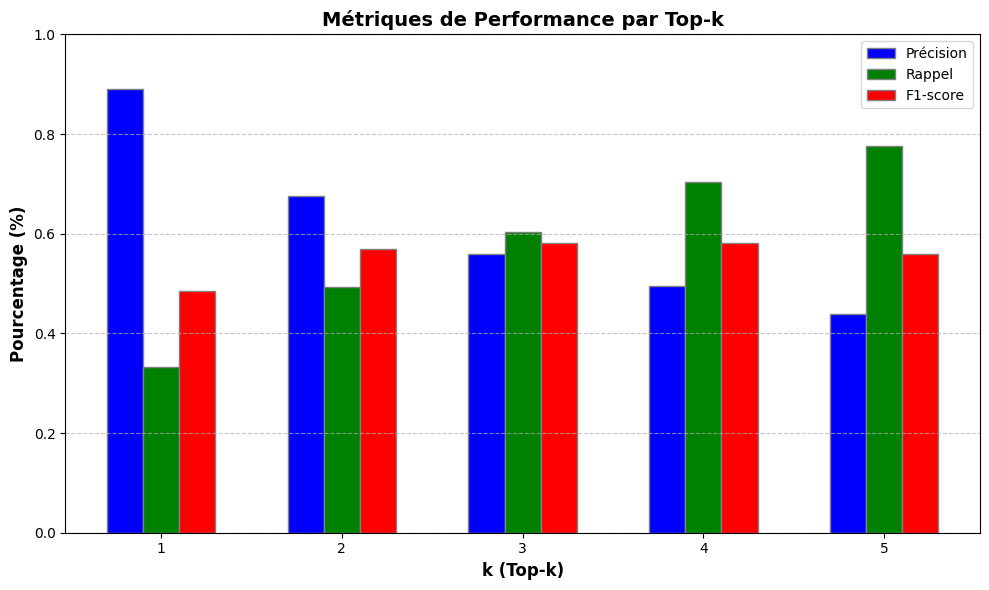

In [ ]:
# TODO

k_values = [1, 2, 3, 4, 5]

bar_width=0.2



plt.figure(figsize=(10, 6))

r1 = np.arange(len(k_values))

r2 = [x + bar_width for x in r1]

r3 = [x + bar_width for x in r2]



plt.bar(r1, precision_at_k, color='b', width=bar_width, edgecolor='grey', label='Précision')

plt.bar(r2, recall_at_k, color='g', width=bar_width, edgecolor='grey', label='Rappel')

plt.bar(r3, f1_score_at_k, color='r', width=bar_width, edgecolor='grey', label='F1-score')



plt.xlabel('k (Top-k)', fontweight='bold', fontsize=12)

plt.ylabel('Pourcentage (%)', fontweight='bold', fontsize=12)

plt.title('Métriques de Performance par Top-k', fontweight='bold', fontsize=14)

plt.xticks([r + bar_width for r in range(len(k_values))], k_values)  # Position des labels sur l'axe des x

plt.ylim(0, 1)  # Limites de l'axe y

plt.grid(axis='y', linestyle='--', alpha=0.7)



plt.legend()

plt.tight_layout()

plt.show()



# END TODO

In [ ]:
# Réponse :

# C'est en k égale à 4 que se trouve l'optimum (avec un f1-score de 58.186%).
# Ce qui est logique puisque le nombre de passage pertinent dans le jeu de validation est entre 2 et 4 (là où se trouve les plus grand score).

### 3.2 RAG figé avec FAISS (14 points)

Maintenant on vous demande d'utiliser FAISS pour l'indexation des plongements des passages.



[FAISS (Facebook AI Similarity Search)](https://ai.meta.com/tools/faiss/) est une bibliothèque open-source développée par Meta pour la recherche de similarité rapide sur des vecteurs denses, comme des embeddings de textes ou d'images. Elle est optimisée pour gérer de grands volumes de données en haute dimension et peut être accélérée avec des GPU. FAISS est largement utilisée pour des systèmes de recommandation ou la recherche d'information à grande échelle. Pour plus de détails, veuillez consulter  [le tutoriel sur Moodle](https://moodle.polymtl.ca/course/view.php?id=2813).


#### 3.2.1 Initialisez l'indexation FAISS avec les plongements des passages (2 points)



Utilisez les plongements des passages générés au niveau de la question 3.1.1 et indexez-les avec FAISS. Vérifiez que le nombre de plongements dans l'objet FAISS est bien le même que le nombre de passages. N'oubliez pas qu'on veut une indexation basée sur la similarité cosinus.

In [ ]:
# TODO

index_system = faiss.IndexFlatIP(text_ref_embedded.shape[1])

embeddings_ref_np = text_ref_embedded.numpy()

faiss.normalize_L2(embeddings_ref_np)

index_system.add(embeddings_ref_np)

# END TODO

#### 3.2.2 Récupération des passages avec FAISS (4 points)



Implémentez la fonction _'retrieve_passages_faiss'_ qui retourne les indices des $k$ passages les plus similaires pour une question à l'aide d'un indexation FAISS


In [ ]:
def retrieve_passages_faiss(questions: list, vector_index: faiss.IndexFlatL2, k: int, embedding_model_tokenizer, embedding_model):

    """

    Retourne les k passages les plus pertinents pour chaque question passée en paramètre



    Paramètres:

    questions       : Les questions pour lesquelles on cherche les passages les plus pertinents

    vector_index    : L'objet d'indexation FAISS

    k               : le nombre de passages à retourner

    tokenizer       : Segmenteur du modèle de plongements

    model           : Modèle de plongements



    Retourne:

    Les indices des k passages les plus pertinents pour la question

    """

    # TODO

    questions_embeddings = encode_sequences(questions,embedding_model_tokenizer,embedding_model)

    new_questions_embeddings= np.array(questions_embeddings)

    faiss.normalize_L2(new_questions_embeddings)

    distances, knn = vector_index.search(new_questions_embeddings,k=k)

    return knn

    # END TODO

#### 3.2.3 Exécution de FAISS (4 points)



Exécutez maintenant la fonction _"retrieve_passages_faiss"_ pour récupérer les bons passages pour les questions du jeu de validation avec votre k optimal.

In [ ]:
# TODO

k_opti=4

knn_with_faiss = retrieve_passages_faiss(df_val_question, index_system, k_opti, tokenizer_embeddings, model_embeddings)

# END TODO

100%|██████████| 500/500 [00:03<00:00, 133.64it/s]


#### 3.2.4 Calculez les métriques Precision@K et Rappel@K pour les passages retrouvés avec FAISS avec votre k optimal (2 points)

In [ ]:
# TODO

precision_k_faiss=compute_precision_at_k(truth_ref_val, knn_with_faiss)

recall_k_faiss=compute_recall_at_k(truth_ref_val, knn_with_faiss)

print(f"Précision@{k_opti} : {precision_k_faiss*100:.3f}%; Rappel@{k_opti} : {recall_k_faiss*100:.3f}%: F1-score@{k_opti} : {(2*precision_k_faiss*recall_k_faiss/(recall_k_faiss+precision_k_faiss))*100:.3f}%")

torch.cuda.empty_cache()

# END TODO

Précision@4 : 49.550%; Rappel@4 : 70.467%: F1-score@4 : 58.186%


#### 3.2.5 Quelle remarque pouvez-vous faire sur l'utilisation de FAISS en termes de passages retrouvés, de temps d'exécution et de tout autre élément qui vous semble approprié ? (2 points)

> Réponse :

> * En termes de performance ne change rien (a priori une erreur de ma part)

> * En termes de rapidité, il sera plus rapide pour un plus grand jeu de donnée

### 3.3 Génération des réponses (5 points)



Générez maintenant les réponses des questions sur l'ensemble de validation avec les passages récupérés. Pour générer les réponses, vous devez concaténer les passages pertinents avec la question et donner le tout au modèle de génération. Faites-le sur l'ensemble du jeu de validation. Pour la méthode, vous avez le choix entre les passages retrouvés avec FAISS ou manuellement (avec votre propre implémentation). Faites cela pour toutes les valeurs de $k$: (1, 2, 3 et 4).

    Affichez un exemple d'invite (prompt) qui sera envoyé au modèle de génération

In [ ]:
# TODO

# Affichez un exemple d'invite

k=1

knn_with_faiss_example = retrieve_passages_faiss(np.array([df_val_question[0]]), index_system, k, tokenizer_embeddings, model_embeddings)

docs_example = [[{"role":"system","content":f"{df_ref[df_ref['id']==index_context]['text'].item()}"} for index_context in context_ids] for context_ids in knn_with_faiss_example]

questions_example = [({"role": "user", "content": row["question"]}, row["id"]) for _, row in df_val.iterrows()]

conversation = [docs_example[0]+[{"role":"user","content":"Answer the following question with a concise answer."},questions_example[0][0]]]

input_template_example = tokenizer_decoder.apply_chat_template(conversation = conversation,

                                                                   tokenize=False,

                                                                    truncaton=False,

                                                                    padding=False,

                                                                    add_generation_prompt=True,

                                                                   )

print(f"Exemple d invite qui sera envoyé au modèle : \n {input_template_example}")

# END TODO

100%|██████████| 1/1 [00:00<00:00, 89.23it/s]

Exemple d invite qui sera envoyé au modèle : 
 ['<|system|>\n Polymorphism in the CYSLTR2 gene has been associated with the inheritance of asthma in separate populations. The M201V variant of CYSLTR2 exhibits decreased responsiveness to LTD4, suggesting that this hypo-responsiveness underlies its asthma transmission-protecting effect.<|end|>\n<|user|>\nAnswer the following question with a concise answer.<|end|>\n<|user|>\nWhat is the effect of the M201V variant of CYSLTR2 on responsiveness to LTD4?<|end|>\n<|assistant|>\n']


In [ ]:
# TODO

# Envoyez les prompts au modèle

input_template_example = tokenizer_decoder.apply_chat_template(conversation = conversation,

                                                                   tokenize=True,

                                                                    truncaton=True,

                                                                    padding=True,

                                                                    add_generation_prompt=True,

                                                                  return_tensors="pt"

                                                              ).to(DEVICE)

outputs_example = model_decoder.generate(input_template_example, max_new_tokens=32, num_beams=1,do_sample=False)

print(f"{tokenizer_decoder.batch_decode(outputs_example, skip_special_tokens=True)}")

# END TODO

['Polymorphism in the CYSLTR2 gene has been associated with the inheritance of asthma in separate populations. The M201V variant of CYSLTR2 exhibits decreased responsiveness to LTD4, suggesting that this hypo-responsiveness underlies its asthma transmission-protecting effect. Answer the following question with a concise answer. What is the effect of the M201V variant of CYSLTR2 on responsiveness to LTD4? Decreased responsiveness to LTD4.']


In [ ]:
BATCH_SIZE = 1

with torch.no_grad():

    model_decoder.eval()

    overall_answers = []

    for k_opti in range(1, 5):

        # Récupérer les passages recommandés en fonction de k_opti

        knn_with_faiss = retrieve_passages_faiss(df_val_question, index_system, k_opti, tokenizer_embeddings, model_embeddings)

        torch.cuda.empty_cache()

        questions = [({"role": "user", "content": row["question"]}, row["id"]) for _, row in df_val.iterrows()]

        generated_answer = []

        # Processus par batch

        for i in tqdm(range(0, len(questions), BATCH_SIZE)):

            # Sélectionner le batch de questions et leurs ids

            batch_questions = questions[i:i + BATCH_SIZE]

            bacth_ids = [question[1] for question in batch_questions]

            # Créer les inputs pour le modèle en batch

            input_context = [[{"role":"system","content":f"{df_ref[df_ref['id']==index_context]['text'].item()}"} for index_context in context_ids] for context_ids in knn_with_faiss[i:i + BATCH_SIZE]]

            input_questions = [[{"role":"user","content":"Answer the following question with a concise answer."},q[0]] for q in batch_questions]

            input_all = [input_context[index_dialogue]+dialogue  for index_dialogue,dialogue in enumerate(input_questions)]

            input_template = tokenizer_decoder.apply_chat_template(conversation = input_all,

                                                                   tokenize=True,

                                                                    truncaton=True,

                                                                    padding=True,

                                                                    add_generation_prompt=True,

                                                                   return_tensors="pt").to(DEVICE)

            # Génération du texte avec le modèle

            outputs = model_decoder.generate(input_template,

                                         max_new_tokens=32,

                                         num_beams=1,

                                         do_sample=False)

            # Décoder les réponses générées et extraire la première solution

            decoded_answers = tokenizer_decoder.batch_decode(outputs, skip_special_tokens=True)

            for j, answer in enumerate(decoded_answers):

                id_question = batch_questions[j][1]

                solutions = answer.split("?")[1]  # Couper la sortie après le premier "?"

                generated_answer.append((solutions, id_question))

            torch.cuda.empty_cache()

        # Stocker les réponses générées pour le k_opti actuel

        df_pred_val = pd.DataFrame(generated_answer,columns=["answer","id"])

        df_pred_val.to_csv(f'./pred_val_{k_opti}.csv')

        overall_answers.append(generated_answer)

100%|██████████| 500/500 [10:44<00:00,  1.29s/it]


### 3.4 Évaluation des réponses (3 points)



Utilisez la métrique BLEU (BLEU-1 et BLEU-2) pour évaluer les réponses générées par rapport aux réponses attendues sur le jeu de validation.

In [ ]:
df_truth_val = df_val[["answer","id"]]

In [ ]:
# TODO

df_pred_val_1 = pd.DataFrame(overall_answers[0], columns=["answer","id"])

df_pred_val_2 = pd.DataFrame(overall_answers[1], columns=["answer","id"])

df_pred_val_3 = pd.DataFrame(overall_answers[2], columns=["answer","id"])

df_pred_val_4 = pd.DataFrame(overall_answers[3], columns=["answer","id"])


# Scores des générations avec BLEU-1 et BLEU-2 sur le jeu de validation

print(f"k = 1 - Score Bleu-1 : {evaluate_bleu(df_truth_val,df_pred_val_1,1)*100:.3f}%, score Bleu-2 : {evaluate_bleu(df_truth_val,df_pred_val_1,2)*100:.3f}%")

print(f"k = 2 - Score Bleu-1 : {evaluate_bleu(df_truth_val,df_pred_val_2,1)*100:.3f}%, score Bleu-2 : {evaluate_bleu(df_truth_val,df_pred_val_2,2)*100:.3f}%")

print(f"k = 3 - Score Bleu-1 : {evaluate_bleu(df_truth_val,df_pred_val_3,1)*100:.3f}%, score Bleu-2 : {evaluate_bleu(df_truth_val,df_pred_val_3,2)*100:.3f}%")

print(f"k = 4 - Score Bleu-1 : {evaluate_bleu(df_truth_val,df_pred_val_4,1)*100:.3f}%, score Bleu-2 : {evaluate_bleu(df_truth_val,df_pred_val_4,2)*100:.3f}%")

# END TODO

k = 1 - Score Bleu-1 : 52.918%, score Bleu-2 : 41.505%
k = 2 - Score Bleu-1 : 56.925%, score Bleu-2 : 45.793%
k = 3 - Score Bleu-1 : 57.429%, score Bleu-2 : 46.134%
k = 4 - Score Bleu-1 : 56.887%, score Bleu-2 : 45.680%


Résultats :

* k = 1 - Score Bleu-1 : 52.918%, score Bleu-2 : 41.505%

* k = 2 - Score Bleu-1 : 56.925%, score Bleu-2 : 45.793%

* k = 3 - Score Bleu-1 : 57.429%, score Bleu-2 : 46.134%

* k = 4 - Score Bleu-1 : 56.887%, score Bleu-2 : 45.680%

En vous basant sur les résultats de génération du modèle sur l'ensemble de validation, quel est le nombre optimal de passages à passer au modèle ? Qu'en concluez-vous par rapport au nombre optimal de passages trouvé à la question 3.1.4 ?

> Réponse : Le k optimale est de 3, contrairement à la 3.1.4 qui est de 4. On en conclut que le RAG a moins besoin de documents comparé à seulement la partie retriever du système pour cette ensemble de validation.

### 3.5 Test de soumission Kaggle

Faites également une soumission Kaggle de votre modèle RAG sur le fichier de test et reportez la valeur obtenue ici.


In [ ]:
with torch.no_grad():

    model_decoder.eval()

    overall_answers_test = []

    k_opti=3

    # Récupérer les passages recommandés en fonction de k_opti

    knn_with_faiss = retrieve_passages_faiss(df_test["question"].to_numpy(), index_system, k_opti, tokenizer_embeddings, model_embeddings)

    torch.cuda.empty_cache()

    questions = [({"role": "user", "content": row["question"]}, row["id"]) for _, row in df_test.iterrows()]

    generated_answer = []

    # Processus par batch

    for i in tqdm(range(0, len(questions), BATCH_SIZE)):

        # Sélectionner le batch de questions et leurs ids

        batch_questions = questions[i:i + BATCH_SIZE]

        # Créer les inputs pour le modèle en batch

        input_context = [[{"role":"system","content":f"{df_ref[df_ref['id']==index_context]['text'].item()}"} for index_context in context_ids] for context_ids in knn_with_faiss[i:i + BATCH_SIZE]]

        input_questions = [[{"role":"user","content":"Answer the following question concisely only with the answer."},q[0]] for q in batch_questions]

        input_all = [input_context[index_dialogue] + dialogue for index_dialogue,dialogue in enumerate(input_questions)]

        input_template = tokenizer_decoder.apply_chat_template(conversation = input_all,

                                   tokenize=True,

                                    truncaton=True,

                                    padding=True,

                                    add_generation_prompt=True,

                                   return_tensors="pt").to(DEVICE)

        # Génération du texte avec le modèle

        outputs = model_decoder.generate(input_template,

                                     max_new_tokens=32,

                                     num_beams=1,

                                     do_sample=False)

        # Décoder les réponses générées et extraire la première solution

        decoded_answers = tokenizer_decoder.batch_decode(outputs, skip_special_tokens=True)

        for j, answer in enumerate(decoded_answers):

            id_question = batch_questions[j][1]

            solutions = answer.split("?")[1]  # Diviser après le premier "?"

            generated_answer.append((solutions, id_question))

        torch.cuda.empty_cache()

    # Stocker les réponses générées pour le k_opti actuel

    overall_answers_test.append(generated_answer)

100%|██████████| 500/500 [09:28<00:00,  1.14s/it]


Résultat RAG vanilla sur le jeu de test : 36% (BLEU-2)

## 4. Compétition Kaggle (40 points)



Dans cette partie, vous devez implémenter votre propre méthode pour répondre aux questions. Pour rappel, vous ne pouvez pas utiliser de données externes pour entraîner vos modèles, seulement les données fournies, et vous devez utiliser le modèle de génération **'microsoft/Phi-3-mini-128k-instruct'**.



Proposez une architecture plus complexe, ou améliorez les modèles des parties précédentes, afin d’obtenir un score plus élevé que vos autres modèles sur l’ensemble de validation ET dans la compétition Kaggle. Démontrez bien cette amélioration dans votre notebook dans les cellules suivantes. Un autre objectif est d'obtenir le meilleur score de la classe.



Vous devez commencer cette démarche par un état de l'art.



### 4.1. État de l'art (5 points)



Décrivez en **deux paragraphes**, dans une cellule du notebook, avec les références appropriées, les approches de l’état de l’art pour la tâche que vous tentez d'accomplir. Utilisez une recherche dans Google Scholar.



En vous basant sur vos recherches, quelles sont les meilleures techniques de l’état de l’art ?  Soyez brefs et clairs. Attention, on ne vous demande pas les détails d'un papier particulier mais une synthèse des meilleures approches de l'état de l'art.

####Synthèse:


> Réponse : L'approche RE-RAG propose d'améliorer les performances de RAG en ajoutant un cross-encodeur pour réindexer les documents. Contrairement au bi-encodeur, qui encode séparément les requêtes et les documents, le cross-encodeur évalue les paires requête-document simultanément, offrant une meilleure précision dans l'évaluation de leur pertinence mutuelle. Cette étape de réindexation permet d'affiner la sélection des documents pertinents en exploitant la richesse des informations contextuelles entre la requête et chaque document. Plusieurs études montrent l'efficacité de cette approche, notamment pour des tâches de recherche nécessitant une précision élevée (de Souza P. Moreira et al., 2024)(Kim et Lee, 2024)(Alessio et al., 2024).



> Une autre approche consiste à affiner les composants de RAG, en ajustant le modèle d'encodeur et de décodeur en fonction des besoins spécifiques d'un domaine d'application. En fine-tunant ces deux aspects, on peut adapter le système pour qu'il interprète et génère des réponses plus alignées avec le contexte du domaine. Cette personnalisation permet d'améliorer la qualité des résultats, même dans des environnements très spécialisés. Des recherches récentes soulignent les bénéfices d'un fine-tuning ciblé pour améliorer l'adaptation des modèles de récupération et de génération, surtout en combinant l'affinage des deux composants en même temps (Setty et al., 2024)(Siriwardhana et al., 2023).

Références: Listez vos références de manière appropriée (4-5 parmi les meilleures approches)


> RE-RAG : mettre un cross-encoder pour réindexer les documents et reprendre son indexation :

  * Kim, K et Lee, J.-Y. (2024). RE-RAG: Improving Open-Domain QA Performance and Interpretability with Relevance Estimator in Retrieval-Augmented Generation. Dans *Proceedings of the 2024 Conference on Empirical Methods in Natural Language Processing* (pages 22149–22161), Association for Computational Linguistics. https://aclanthology.org/2024.emnlp-main.1236

  * de Souza P. Moreira, G., Ak, R., Schifferer,

B., Xu, M., Osmulski, R., et Oldridge, E. (2024). Enhancing qa text retrieval

with ranking models: Benchmarking, fine-tuning and deploying rerankers for

rag. https://doi.org/10.48550/arXiv.2409.07691

  * Alessio, M., Faggioli, G., Ferro, N., Nardini, F. M., Perego,

R., et al. (2024). Improving rag systems via sentence clustering and reorder-

ing. Dans *RAG@ SIGIR 2024 workshop: The Information Retrieval’s Role in

RAG Systems* (pages 1–10), ACM. https://ceur-ws.org/Vol-3784/paper4.pdf



> Affinage chaque aspect de notre recherche (inclue decoder et encoder) :

  * Siriwardhana, S., Weerasekera, R., Wen, E., Kalu-

arachchi, T., Rana, R., et Nanayakkara, S. (2023). *Improving the domain

adaptation of retrieval augmented generation (rag) models for open domain

question answering.* Transactions of the Association for Computational Lin-

guistics, (11:1–17). https://direct.mit.edu/tacl/article/doi/10.1162/tacl_a_00530/114590/Improving-the-Domain-Adaptation-of-Retrieval

  * Setty, S., Thakkar, H., Lee, A., Chung, E., et Vidra, N.

(2024). Improving retrieval for rag based question answering models on fi-

nancial documents. https://arxiv.org/pdf/2404.07221

### 4.2. Description de votre méthode (5 points)



Décrivez en deux paragraphes l'architecture proposée en soulignant notamment les additions ou l'originalité de l'approche et comment l'état de l'art l'a inspirée

> Réponse : Nous avons modifié notre modèle avec deux améliorations principales. La première de ces améliorations consiste en un affinage du modèle de récupération. Pour effectuer cela, nous ne nous sommes pas contenté d'entrainer tout simplement le modèle sur les données d'entrainements pour maximiser le score-f1. Nous avons plutôt décidé d'effectuer un entrainement contrastif. Pour chaque question, nous avons créé des exemples négatifs en utilisant l'algorithme BM-25 pour obtenir les documents les plus proches d'une question et en sélectionnant ceux qui ne faisaient pas partie des documents réellement pertinents. Nous avons aussi testé des exemplaires négatifs sélectionné aléatoirement parmi les documents non-pertinents, mais cela n'était pas aussi performants.



> La deuxième principale amélioration que nous avons implémentée est l'ajout d'un processus de reclassement du module de récupération de documents comme présenté par Kim et Lee (2024). Nous avons donc décidé d'intégrer l'encodeur croisé **'bge-reranker-large'**, disponible sur HuggingFace. Nous combinons cet encodeur à celui obtenu après l'affinage présenté précédemment, pour effectuer une seconde évaluation sur les documents à retourner. Nous avons aussi testé de le combiner au modèle initial et à un modèle plus gros de la même famille que ce dernier.

### 4.3. Implémentation (20 points)



Implémentez votre modèle ci-dessous dans une ou plusieurs cellules (veillez à la qualité de votre code) et effectuez votre soumission sur Kaggle en respectant le format de soumission.

#### Affinage du modèle pour récupérer les documents

In [ ]:
# Créer les triplets en vérifiant que l'identifiant existe bien dans df_corpus

def create_triplets_random(df_train, all_passages, num_triplets=1000):

    triplets = []

    for _, row in tqdm(df_train.iterrows()):

        question = row["question"]

        pos_passages_ids = [int(pid) for pid in row["text_ids"].strip('[]').split()]

        pos_passages = [

            df_corpus.loc[df_corpus['id'] == pid, 'text'].iloc[0]

            for pid in pos_passages_ids if pid in df_corpus['id'].values

        ]

        for pos_passage in pos_passages:

            neg_passage = random.choice(all_passages)

            while neg_passage in pos_passages:

                neg_passage = random.choice(all_passages)

            triplets.append((question, pos_passage, neg_passage))

            if len(triplets) >= num_triplets:

                break

    return triplets



def create_triplets_bm25_all(df_train, df_corpus, num_negatives=3):

    # Préparer les données pour BM25

    all_texts = df_corpus["text"].tolist()

    tokenized_corpus = [text.split() for text in all_texts]

    bm25 = BM25Okapi(tokenized_corpus)

    triplets = []

    for _, row in tqdm(df_train.iterrows()):

        question = row["question"]

        question_tokens = question.split()

        pos_passages_ids = [int(pid) for pid in row["text_ids"].strip('[]').split()]

        pos_passages = [

            df_corpus.loc[df_corpus['id'] == pid, 'text'].iloc[0]

            for pid in pos_passages_ids if pid in df_corpus['id'].values

        ]

        scores = bm25.get_scores(question_tokens)

        sorted_indices = sorted(range(len(scores)), key=lambda i: scores[i], reverse=True)

        neg_passages = []

        for idx in sorted_indices:

            candidate_passage = all_texts[idx]

            if candidate_passage not in pos_passages:

                neg_passages.append(candidate_passage)

            if len(neg_passages) >= num_negatives:

                break

        for pos_passage in pos_passages:

            for neg_passage in neg_passages:

                triplets.append((question, pos_passage, neg_passage))

    return triplets



triplets_bm25 = create_triplets_bm25_all(df_train, df_corpus, num_negatives=3)


1747it [00:56, 30.89it/s]


##### Entrainement contrastif du modèle

In [ ]:
class TripletDataset(Dataset):

    def __init__(self, triplets, tokenizer, max_length=128):

        self.triplets = triplets

        self.tokenizer = tokenizer

        self.max_length = max_length



    def __len__(self):

        return len(self.triplets)



    def __getitem__(self, idx):

        question, pos_passage, neg_passage = self.triplets[idx]

        question_enc = self.tokenizer(question, truncation=True, padding='max_length', max_length=self.max_length, return_tensors="pt")

        pos_passage_enc = self.tokenizer(pos_passage, truncation=True, padding='max_length', max_length=self.max_length, return_tensors="pt")

        neg_passage_enc = self.tokenizer(neg_passage, truncation=True, padding='max_length', max_length=self.max_length, return_tensors="pt")

        return question_enc, pos_passage_enc, neg_passage_enc



train_dataset = TripletDataset(triplets_bm25, tokenizer_embeddings)

train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)



def triplet_loss(anchor, positive, negative, margin=1.0):

    pos_dist = torch.nn.functional.cosine_similarity(anchor, positive)

    neg_dist = torch.nn.functional.cosine_similarity(anchor, negative)

    loss = torch.relu(neg_dist - pos_dist + margin)

    return loss.mean()



optimizer = AdamW(model_embeddings.parameters(), lr=2e-7)



model_embeddings.train()

for epoch in range(2):

    total_loss = 0

    print(f"\n--- Début de l'Epoch {epoch + 1} ---\n")



    for i, (question_enc, pos_passage_enc, neg_passage_enc) in enumerate(tqdm(train_dataloader, desc=f"Epoch {epoch + 1}")):

        optimizer.zero_grad()



        question_embed = model_embeddings(**{k: v.squeeze().to(DEVICE) for k, v in question_enc.items()}).last_hidden_state[:, 0, :]

        pos_embed = model_embeddings(**{k: v.squeeze().to(DEVICE) for k, v in pos_passage_enc.items()}).last_hidden_state[:, 0, :]

        neg_embed = model_embeddings(**{k: v.squeeze().to(DEVICE) for k, v in neg_passage_enc.items()}).last_hidden_state[:, 0, :]



        loss = triplet_loss(question_embed, pos_embed, neg_embed)

        loss.backward()

        optimizer.step()



        total_loss += loss.item()



    avg_loss = total_loss / len(train_dataloader)

    print(f"Perte moyenne après l'Epoch {epoch + 1}: {avg_loss}")


--- Début de l'Epoch 1 ---



Epoch 1: 100%|██████████| 465/465 [02:56<00:00,  2.63it/s]


Perte moyenne après l'Epoch 1: 0.8524685462315877

--- Début de l'Epoch 2 ---



Epoch 2: 100%|██████████| 465/465 [02:56<00:00,  2.64it/s]

Perte moyenne après l'Epoch 2: 0.8149839476872516


##### Évaluation de l'affinage

In [ ]:
#Comparaison fine-tune

model_finetuned = model_embeddings.eval()



metrics_base = {'precision': [], 'recall': [], 'f1_score': []}

metrics_finetuned = {'precision': [], 'recall': [], 'f1_score': []}



# fonction d'évaluation

def evaluate_model(model, tokenizer,model_name):

    precision_at_k = []

    recall_at_k = []

    f1_score_at_k = []

    text_ref_embedded = encode_sequences(df_corpus["text"], tokenizer, model)  # Embedding des passages



    with torch.no_grad():

        for k in range(1, 6):

            results = retrieve_passages(df_val_question, text_ref_embedded, k, tokenizer, model)



            precision_k = compute_precision_at_k(truth_ref_val, results)

            recall_k = compute_recall_at_k(truth_ref_val, results)

            f1_k = 2 * precision_k * recall_k / (precision_k + recall_k) if (precision_k + recall_k) > 0 else 0



            precision_at_k.append(precision_k)

            recall_at_k.append(recall_k)

            f1_score_at_k.append(f1_k)



            print(f"{model_name} - Précision@{k} : {precision_k*100:.3f}%; Rappel@{k} : {recall_k*100:.3f}%; F1-score@{k} : {f1_k*100:.3f}%")

            torch.cuda.empty_cache()



    return precision_at_k, recall_at_k, f1_score_at_k



print("\nÉvaluation du modèle fine-tuné :")

metrics_finetuned['precision'], metrics_finetuned['recall'], metrics_finetuned['f1_score'] = evaluate_model(model_finetuned,tokenizer_embeddings, "Modèle affiné")



Évaluation du modèle fine-tuné :


100%|██████████| 500/500 [00:03<00:00, 131.00it/s]


Modèle affiné - Précision@1 : 86.600%; Rappel@1 : 32.367%; F1-score@1 : 47.122%


100%|██████████| 500/500 [00:03<00:00, 132.73it/s]


Modèle affiné - Précision@2 : 67.900%; Rappel@2 : 49.417%; F1-score@2 : 57.202%


100%|██████████| 500/500 [00:03<00:00, 130.70it/s]


Modèle affiné - Précision@3 : 58.533%; Rappel@3 : 62.817%; F1-score@3 : 60.599%


100%|██████████| 500/500 [00:03<00:00, 132.31it/s]


Modèle affiné - Précision@4 : 53.200%; Rappel@4 : 75.400%; F1-score@4 : 62.384%


100%|██████████| 500/500 [00:03<00:00, 133.08it/s]


Modèle affiné - Précision@5 : 48.160%; Rappel@5 : 84.733%; F1-score@5 : 61.414%


#### Historique :

Évaluation du modèle fine-tuné (échantillon négatif tiré aléatoirement - 1000 ; lr=1e-7):



100%|██████████| 13314/13314 [01:48<00:00, 122.46it/s]

100%|██████████| 500/500 [00:03<00:00, 131.06it/s]



Modèle affiné - Précision@1 : 88.800%; Rappel@1 : 33.183%; F1-score@1 : 48.313%



100%|██████████| 500/500 [00:03<00:00, 133.21it/s]



Modèle affiné - Précision@2 : 67.300%; Rappel@2 : 49.183%; F1-score@2 : 56.833%



100%|██████████| 500/500 [00:03<00:00, 129.07it/s]



Modèle affiné - Précision@3 : 56.333%; Rappel@3 : 60.683%; F1-score@3 : 58.427%



100%|██████████| 500/500 [00:03<00:00, 130.58it/s]



Modèle affiné - Précision@4 : 50.450%; Rappel@4 : 71.750%; F1-score@4 : 59.244%



100%|██████████| 500/500 [00:03<00:00, 131.95it/s]



Modèle affiné - Précision@5 : 44.880%; Rappel@5 : 79.350%; F1-score@5 : 57.333%



----------------------------------------------------------------------------





Évaluation du modèle fine-tuné (échantillon négatif tiré aléatoirement - 3000 ; lr=2e-7) :



100%|██████████| 13314/13314 [01:43<00:00, 128.30it/s]

100%|██████████| 500/500 [00:03<00:00, 137.58it/s]



Modèle affiné - Précision@1 : 88.800%; Rappel@1 : 33.150%; F1-score@1 : 48.277%



100%|██████████| 500/500 [00:03<00:00, 137.44it/s]



Modèle affiné - Précision@2 : 67.800%; Rappel@2 : 49.517%; F1-score@2 : 57.234%



100%|██████████| 500/500 [00:03<00:00, 136.59it/s]



Modèle affiné - Précision@3 : 56.400%; Rappel@3 : 60.650%; F1-score@3 : 58.448%



100%|██████████| 500/500 [00:03<00:00, 138.48it/s]



Modèle affiné - Précision@4 : 51.550%; Rappel@4 : 73.150%; F1-score@4 : 60.479%



100%|██████████| 500/500 [00:03<00:00, 136.13it/s]



Modèle affiné - Précision@5 : 46.080%; Rappel@5 : 81.200%; F1-score@5 : 58.795%



----------------------------------------------------------------------------



Évaluation du modèle fine-tuné deux fois ((échantillon négatif tiré aléatoirement - 3000 ; lr=2e-7) puis (échantillon négatif tiré aléatoirement - 7000 ; lr=2e-7)):



100%|██████████| 13314/13314 [01:43<00:00, 128.03it/s]

100%|██████████| 500/500 [00:03<00:00, 136.59it/s]



Modèle affiné - Précision@1 : 88.600%; Rappel@1 : 33.050%; F1-score@1 : 48.142%



100%|██████████| 500/500 [00:03<00:00, 138.32it/s]



Modèle affiné - Précision@2 : 68.000%; Rappel@2 : 49.567%; F1-score@2 : 57.338%



100%|██████████| 500/500 [00:03<00:00, 137.50it/s]



Modèle affiné - Précision@3 : 57.133%; Rappel@3 : 61.500%; F1-score@3 : 59.236%



100%|██████████| 500/500 [00:03<00:00, 137.37it/s]



Modèle affiné - Précision@4 : 52.150%; Rappel@4 : 74.050%; F1-score@4 : 61.200%



100%|██████████| 500/500 [00:03<00:00, 137.85it/s]



Modèle affiné - Précision@5 : 46.800%; Rappel@5 : 82.517%; F1-score@5 : 59.726%



-------------------------------------------------------------------------------



Évaluation du modèle fine-tuné (échantillon négative avec bm25):



100%|██████████| 13314/13314 [01:43<00:00, 129.15it/s]

100%|██████████| 500/500 [00:03<00:00, 136.70it/s]



Modèle affiné - Précision@1 : 86.600%; Rappel@1 : 32.367%; F1-score@1 : 47.122%



100%|██████████| 500/500 [00:03<00:00, 137.43it/s]



Modèle affiné - Précision@2 : 67.900%; Rappel@2 : 49.417%; F1-score@2 : 57.202%



100%|██████████| 500/500 [00:03<00:00, 135.88it/s]



Modèle affiné - Précision@3 : 58.467%; Rappel@3 : 62.750%; F1-score@3 : 60.533%



100%|██████████| 500/500 [00:03<00:00, 136.22it/s]



Modèle affiné - Précision@4 : 53.200%; Rappel@4 : 75.400%; F1-score@4 : 62.384%



100%|██████████| 500/500 [00:03<00:00, 136.03it/s]



Modèle affiné - Précision@5 : 48.160%; Rappel@5 : 84.733%; F1-score@5 : 61.414%




#### Implémentation du système : RE-RAG avec/sans affinage

In [ ]:
model_finetuned.save_pretrained("kaggle/working/baa-fine-tuned-bm25")

tokenizer_embeddings.save_pretrained("kaggle/working/baa-fine-tuned-bm25")

('kaggle/working/baa-fine-tuned-bm25/tokenizer_config.json',
 'kaggle/working/baa-fine-tuned-bm25/special_tokens_map.json',
 'kaggle/working/baa-fine-tuned-bm25/vocab.txt',
 'kaggle/working/baa-fine-tuned-bm25/added_tokens.json',
 'kaggle/working/baa-fine-tuned-bm25/tokenizer.json')

In [ ]:
documents = [Document(page_content=row['text'],metadata={"source" : str(row['id'])}) for _,row in df_corpus.iterrows()]

embeddingsModel = HuggingFaceEmbeddings(

    model_name="/kaggle/working/baa-fine-tuned-bm25" #autres modèles testés : "BAAI/bge-large-en-v1.5" #"BAAI/bge-small-en-v1.5"

    )

model_cross_encoder = HuggingFaceCrossEncoder(model_name="BAAI/bge-reranker-large")

##### Identification des hyper-paramètres avec RE-RAG avec/sans affinage

In [ ]:
# TODO
queries = df_val["question"].to_numpy()

with torch.no_grad():

    precision_at_k = []

    recall_at_k=[]

    f1_score_at_k=[]

    for k_opti in tqdm([2,3,4]):

        for top_n in tqdm([1,2,3,4]):

            if k_opti >= top_n:

                index = faiss.IndexFlatL2()

                retriever = FAISS.from_documents(documents , embeddingsModel).as_retriever(

                    search_kwargs={"k": k_opti},

                    return_intermediate_steps=False,

                )

                compressor = CrossEncoderReranker(model=model_cross_encoder, top_n=top_n)

                compression_retriever = ContextualCompressionRetriever(

                    base_compressor=compressor, base_retriever=retriever

                )

                results_k = [[int(res.metadata["source"]) for res in compression_retriever.invoke(query, config={'callbacks': [ConsoleCallbackHandler()]})] for query in queries]

                precision_k=compute_precision_at_k(truth_ref_val, results_k)

                recall_k=compute_recall_at_k(truth_ref_val, results_k)

                precision_at_k.append(precision_k)

                recall_at_k.append(recall_k)

                torch.cuda.empty_cache()

        # END TODO

In [ ]:
np_precision_at_k=np.array(precision_at_k[:2])

np_recall_at_k=np.array(recall_at_k[:2])

np_f1_score_at_k = 2*np_precision_at_k*np_recall_at_k / (np_precision_at_k + np_recall_at_k)

print(f"f1-score@k@n k = 2 et pour n dans [1,2] : {np_f1_score_at_k}")



np_precision_at_k=np.array(precision_at_k[2:2+3])

np_recall_at_k=np.array(recall_at_k[2:2+3])

np_f1_score_at_k = 2*np_precision_at_k*np_recall_at_k / (np_precision_at_k + np_recall_at_k)

print(f"f1-score@k@n k = 3 et pour n dans [1,2,3] : {np_f1_score_at_k}")



np_precision_at_k=np.array(precision_at_k[5:5+4])

np_recall_at_k=np.array(recall_at_k[5:5+4])

np_f1_score_at_k = 2*np_precision_at_k*np_recall_at_k / (np_precision_at_k + np_recall_at_k)


print(f"f1-score@k@n k = 4 et pour n dans [1,2,3,4] : {np_f1_score_at_k}")


Exemple (Pour un RE-RAG avec comme premier encoder affiné à l'aide de BM25):
* f1-score@k@n k = 2 et pour n dans [1,2] : [0.50034122 0.56438169]
* f1-score@k@n k = 3 et pour n dans [1,2,3] : [0.50470486 0.57124061 0.60414658]
* f1-score@k@n k = 4 et pour n dans [1,2,3,4] : [0.50605991 0.56835011 0.58848367 0.61983462]

In [ ]:
import gc



gc.collect()

torch.cuda.empty_cache()

##### Génération avec RE-RAG avec/sans affinage

In [ ]:
overall_answers_re_rag=[]

top_n,k_opti= 4,4

retriever = FAISS.from_documents(documents , embeddingsModel).as_retriever(

    search_kwargs={"k": k_opti}

)

compressor = CrossEncoderReranker(model=model_cross_encoder, top_n=top_n)

compression_retriever = ContextualCompressionRetriever(

    base_compressor=compressor, base_retriever=retriever

)

queries_test = df_test["question"].to_numpy()

docs_recommanded_k_test = [compression_retriever.invoke(query) for query in queries_test]



BATCH_SIZE = 1

torch.cuda.empty_cache()

questions_test = [({"role": "user", "content": row["question"]}, row["id"]) for _, row in df_test.iterrows()]

generated_answer = []



# Processus par batch

for i in tqdm(range(0, len(questions_test), BATCH_SIZE)):

    # Sélectionner le batch de questions et leurs ids

    batch_questions = questions_test[i:i + BATCH_SIZE]

    bacth_ids = [question[1] for question in batch_questions]

    # Créer les inputs pour le modèle en batch

    input_context = [[{"role":"system","content":f"{recommanded_texts_per_question_sub.page_content}"} for recommanded_texts_per_question_sub in recommanded_texts_per_question] for recommanded_texts_per_question in docs_recommanded_k_test[i:i + BATCH_SIZE]]

    input_questions = [[{"role":"user","content":"Answer the following question concisely only with the answer."},q[0]] for q in batch_questions]

    input_all = [input_context[index_dialogue] + dialogue for index_dialogue,dialogue in enumerate(input_questions)]

    input_template = tokenizer_decoder.apply_chat_template(conversation = input_all,

                               tokenize=True,

                                truncaton=True,

                                padding=True,

                                add_generation_prompt=True,

                               return_tensors="pt").to(DEVICE)

    # Génération du texte avec le modèle

    outputs = model_decoder.generate(input_template,

                                 max_new_tokens=32,

                                 num_beams=1,

                                 do_sample=False)



    # Décoder les réponses générées et extraire la première solution

    decoded_answers = tokenizer_decoder.batch_decode(outputs, skip_special_tokens=True)

    for j, answer in enumerate(decoded_answers):

        id_question = batch_questions[j][1]

        solutions = answer.split("?")[1]  # Diviser après le premier "?"

        generated_answer.append((solutions, id_question))

    torch.cuda.empty_cache()


overall_answers_re_rag.append(generated_answer)


### 4.4. Évaluation (2 points)



#### 4.4.1. Évaluez votre modèle sur le jeu de validation en utilisant la métrique BLEU-2 (1 point)

In [ ]:
overall_answers_re_rag=[]

k_opti = 4

top_n = 4

retriever = FAISS.from_documents(documents , embeddingsModel).as_retriever(

    search_kwargs={"k": k_opti}

)

compressor = CrossEncoderReranker(model=model_cross_encoder, top_n=top_n)

compression_retriever = ContextualCompressionRetriever(

    base_compressor=compressor, base_retriever=retriever

)

queries = df_val["question"].to_numpy()

docs_recommanded_k = [compression_retriever.invoke(query) for query in queries]



BATCH_SIZE = 1

torch.cuda.empty_cache()

questions = [({"role": "user", "content": row["question"]}, row["id"]) for _, row in df_val.iterrows()]

generated_answer = []



# Processus par batch

for i in tqdm(range(0, len(questions), BATCH_SIZE)):

    # Sélectionner le batch de questions et leurs ids

    batch_questions = questions[i:i + BATCH_SIZE]

    bacth_ids = [question[1] for question in batch_questions]

    # Créer les inputs pour le modèle en batch

    input_context = [[{"role":"system","content":f"{recommanded_texts_per_question_sub.page_content}"} for recommanded_texts_per_question_sub in recommanded_texts_per_question] for recommanded_texts_per_question in docs_recommanded_k[i:i + BATCH_SIZE]]

    input_questions = [[{"role":"user","content":"Answer the following question concisely only with the answer."},q[0]] for q in batch_questions]

    input_all = [input_context[index_dialogue] + dialogue for index_dialogue,dialogue in enumerate(input_questions)]

    input_template = tokenizer_decoder.apply_chat_template(conversation = input_all,

                               tokenize=True,

                                truncaton=True,

                                padding=True,

                                add_generation_prompt=True,

                               return_tensors="pt").to(DEVICE)

    # Génération du texte avec le modèle

    outputs = model_decoder.generate(input_template,

                                 max_new_tokens=32,

                                 num_beams=1,

                                 do_sample=False)



    # Décoder les réponses générées et extraire la première solution

    decoded_answers = tokenizer_decoder.batch_decode(outputs, skip_special_tokens=True)

    for j, answer in enumerate(decoded_answers):

        id_question = batch_questions[j][1]

        solutions = answer.split("?")[1]  # Diviser après le premier "?"

        generated_answer.append((solutions, id_question))

    torch.cuda.empty_cache()


overall_answers_re_rag.append(generated_answer)


In [ ]:
df_pred_val_finetuned = pd.DataFrame(overall_answers_re_rag[0], columns=["answer","id"])

df_truth_val = df_val[["answer","id"]]

print(evaluate_bleu(df_truth_val,df_pred_val_finetuned,1))

print(evaluate_bleu(df_truth_val,df_pred_val_finetuned,2))

0.5818156646779529
0.465456872308947


#### 4.4.2 Comparez les résultats obtenus avec les modèles précédents sur l'ensemble de validation. Quelles sont vos conclusions? (1 point)

Résultats :

- RE-RAG (sans fine-tune de (BAAI/bge-small-en-v1.5)) : BLEU-1 score = 58% et BLEU-2 score  46%

- RE-RAG (avec fine-tune bm 25 de (BAAI/bge-small-en-v1.5)) : BLEU-1 score = 58% et BLEU-2 score  46%

- RE-RAG (avec fine-tune random du (BAAI/bge-small-en-v1.5)) : BLEU-1 score = 58% et BLEU-2 score  46%

- RE-RAG (avec 2xfine-tune random du (BAAI/bge-small-en-v1.5)) :  BLEU-1 score = 57% et BLEU-2 score  45%

- RE-RAG (avec BAAI/large-en-v2 ) : BLEU-1 : 58% ; BLEU-2 : 46%



>Réponse : Comme on peut le voir avec ces résultats, l'ajout du RE-RAG permet d'améliorer légèrement le score bleu par rapport à la version initiale, en améliorant la qualité des documents retournés. Par contre, le fine-tuning du retriever ne semble pas faire une différence significative en l'ajoutant en plus.

### 4.5. Analyse (8 points)

#### 4.5.1. Avantages/limites/Erreurs types (5 points)

En quelques phrases précises, discutez des avantages et limites de votre meilleure architecture. Analysez les cas d’erreur.

>Réponse : La principale limite de notre approche est le fait que nous avons peu modifié le module de génération de l'algorithme initiale, juste la partie de récupération de documents. La généralité du modèle générateur fait en sorte que la sortie générée n'est nécessairement adapté au type de réponse attendu. On peut voir cela en regardant les exemples ci-dessous. On peut remarquer que malgré que notre score bleu peut apparaitre faible, les réponses obtenues semblent remarquablement pertinentes. Effectivement, notre algorithme semble être capable de très bien retrouver les informations voulues. Malgré le fait que notre score-f1 pour retourner les documents a stagné à environ 62%, notre modèle semble être capable de trouver suffisamment d'information pour répondre aux questions. Par contre, notre principale limitation est le fait que le générateur de réponse ne formule pas les sorties comme on voudrait, même si elles ont le bon sens. Nous avons testé plusieurs formulations de prompt en langage naturel pour obtenir des meilleures réponses, mais cette approche est limitée. Nous ne pouvons aussi pas régler le problème que la métrique d'évaluation ne tient pas en compte du sens sémantique, ce qui est très restrictif.

In [ ]:
print("Prédictions :")

print(df_pred_val_finetuned['answer'][:10].to_markdown(index=False))

print("\nRéponses attendues :")

print(df_truth_val['answer'][:10].to_markdown(index=False))

Prédictions :
| answer                                                                     |
|:---------------------------------------------------------------------------|
| Decreased responsiveness to LTD4.                                          |
| A carbon atom replaces the sulfur atom in position 1.                      |
| 8-demicubes and 8-orthoplex facets.                                        |
| Schedule I controlled substance                                            |
| Estradiol                                                                  |
| NMDA receptor, μ-opioid receptor, κ-opioid receptor, and sigma σ1 receptor |
| Chromosome 7                                                               |
| A synthetic cannabinoid                                                    |
| 3-MeO-PCP                                                                  |
| A non-coordinating anion                                                   |

Réponses attendues :
| answer        

#### 4.5.2. Améliorations potentielles (3 points)



Indiquez deux pistes d’amélioration futures potentielles et pourquoi vous pensez qu'elles permettraient d'obtenir de meilleurs résultats en vous basant sur un raisonnement logique ou sur des références à l'état de l'art

>Réponse : La première piste d'amélioration que nous proposons est d'utiliser une méthode telle que Lora pour affiner le modèle de génération.
Comme un de nos problèmes est le fait que nos sorties n'ont pas le format attendu, entrainer notre modèle sur des données d'entrainement
devrait nécessairement mener notre modèle à générer des sorties plus similaires à ce qui est attendu.

>La deuxième piste d'amélioration potentielle est de faire un affinage bout à bout comme présenté par Siriwardhana et al. (2023),
soit l'entrainement combiné du modèle de récupération et du modèle de génération. Cela permet selon eux de fournir des meilleurs performances que d'entrainer les deux modules séparément.